In [15]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [133]:

# Chargement des données d'entraînement et de test
train_data = pd.read_csv('data/modifie/trainFinal.csv')  
test_data = pd.read_csv('data/modifie/testFinal.csv')



In [125]:
display(train_data)
display(test_data)

,date,store_nbr,family,sales,onpromotion,city,state,flagHoliday,transactions,dcoilwtico,type,cluster,jour,mois,annee,jourSemaine,jourAnnee,semaineAnnee
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,1,NaN,93.12,D,13,1,1,2013,1,1,1
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,1,NaN,93.12,D,13,1,1,2013,1,1,1
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,1,NaN,93.12,D,13,1,1,2013,1,1,1
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,1,NaN,93.12,D,13,1,1,2013,1,1,1
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,1,NaN,93.12,D,13,1,1,2013,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,0,2155.0,47.57,B,6,15,8,2017,1,227,33
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,0,2155.0,47.57,B,6,15,8,2017,1,227,33
3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,0,2155.0,47.57,B,6,15,8,2017,1,227,33
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,0,2155.0,47.57,B,6,15,8,2017,1,227,33


,date,store_nbr,family,onpromotion,sales,city,state,flagHoliday,transactions,dcoilwtico,type,cluster,jour,mois,annee,jourSemaine,jourAnnee,semaineAnnee
0,2017-08-16,1,AUTOMOTIVE,0,NaN,Quito,Pichincha,0,NaN,46.80,D,13,16,8,2017,2,228,33
1,2017-08-16,1,BABY CARE,0,NaN,Quito,Pichincha,0,NaN,46.80,D,13,16,8,2017,2,228,33
2,2017-08-16,1,BEAUTY,2,NaN,Quito,Pichincha,0,NaN,46.80,D,13,16,8,2017,2,228,33
3,2017-08-16,1,BEVERAGES,20,NaN,Quito,Pichincha,0,NaN,46.80,D,13,16,8,2017,2,228,33
4,2017-08-16,1,BOOKS,0,NaN,Quito,Pichincha,0,NaN,46.80,D,13,16,8,2017,2,228,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,POULTRY,1,NaN,Quito,Pichincha,0,NaN,47.26,B,6,31,8,2017,3,243,35
28508,2017-08-31,9,PREPARED FOODS,0,NaN,Quito,Pichincha,0,NaN,47.26,B,6,31,8,2017,3,243,35
28509,2017-08-31,9,PRODUCE,1,NaN,Quito,Pichincha,0,NaN,47.26,B,6,31,8,2017,3,243,35
28510,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,NaN,Quito,Pichincha,0,NaN,47.26,B,6,31,8,2017,3,243,35


In [153]:
# Suppression des colonnes inutiles
data = train_data.drop(['transactions'], axis=1)
test = test_data.drop(['transactions'], axis=1)


data['YearCat'] = data['annee'].astype('category').cat.codes
data['MonthCat'] = data['mois'].astype('category').cat.codes
data['DayCat'] = data['jourAnnee'].astype('category').cat.codes
data['WeekdayCat'] = data['jourSemaine'].astype('category').cat.codes
data['WeekCat'] = data['semaineAnnee'].astype('category').cat.codes




test['YearCat'] = test['annee'].astype('category').cat.codes
test['MonthCat'] = test['mois'].astype('category').cat.codes
test['DayCat'] = test['jourAnnee'].astype('category').cat.codes
test['WeekdayCat'] = test['jourSemaine'].astype('category').cat.codes
test['WeekCat'] = test['semaineAnnee'].astype('category').cat.codes




data['familyCat'] = data.family.astype('category').cat.codes
data['cityCat'] = data.city.astype('category').cat.codes
data['stateCat'] = data.state.astype('category').cat.codes
data['typeCat'] = data.type.astype('category').cat.codes


test['familyCat'] = test.family.astype('category').cat.codes
test['cityCat'] = test.city.astype('category').cat.codes
test['stateCat'] = test.state.astype('category').cat.codes
test['typeCat'] = test.type.astype('category').cat.codes



data = data.drop(['family','city','state'], axis=1)
test = test.drop(['family','city','state'], axis=1)

data = data.drop(['annee', 'mois', 'jourAnnee', 'jourSemaine','semaineAnnee'], axis=1)
test = test.drop(['annee', 'mois', 'jourAnnee', 'jourSemaine','semaineAnnee'], axis=1)


In [127]:
display(data)
data.info()
display(test)
test.info()


,date,store_nbr,sales,onpromotion,flagHoliday,dcoilwtico,type,cluster,jour,YearCat,MonthCat,DayCat,WeekdayCat,WeekCat,familyCat,cityCat,stateCat,typeCat
0,2013-01-01,1,0.000,0,1,93.12,D,13,1,0,0,0,1,0,0,18,12,3
1,2013-01-01,1,0.000,0,1,93.12,D,13,1,0,0,0,1,0,1,18,12,3
2,2013-01-01,1,0.000,0,1,93.12,D,13,1,0,0,0,1,0,2,18,12,3
3,2013-01-01,1,0.000,0,1,93.12,D,13,1,0,0,0,1,0,3,18,12,3
4,2013-01-01,1,0.000,0,1,93.12,D,13,1,0,0,0,1,0,4,18,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,438.133,0,0,47.57,B,6,15,4,7,226,1,32,28,18,12,1
3000884,2017-08-15,9,154.553,1,0,47.57,B,6,15,4,7,226,1,32,29,18,12,1
3000885,2017-08-15,9,2419.729,148,0,47.57,B,6,15,4,7,226,1,32,30,18,12,1
3000886,2017-08-15,9,121.000,8,0,47.57,B,6,15,4,7,226,1,32,31,18,12,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 18 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   sales        float64       
 3   onpromotion  int64         
 4   flagHoliday  int64         
 5   dcoilwtico   float64       
 6   type         object        
 7   cluster      int64         
 8   jour         int64         
 9   YearCat      int8          
 10  MonthCat     int8          
 11  DayCat       int16         
 12  WeekdayCat   int8          
 13  WeekCat      int8          
 14  familyCat    int8          
 15  cityCat      int8          
 16  stateCat     int8          
 17  typeCat      int8          
dtypes: datetime64[ns](1), float64(2), int16(1), int64(5), int8(8), object(1)
memory usage: 234.7+ MB


,date,store_nbr,onpromotion,sales,flagHoliday,dcoilwtico,type,cluster,jour,YearCat,MonthCat,DayCat,WeekdayCat,WeekCat,familyCat,cityCat,stateCat,typeCat
0,2017-08-16,1,0,NaN,0,46.80,D,13,16,0,0,0,2,0,0,18,12,3
1,2017-08-16,1,0,NaN,0,46.80,D,13,16,0,0,0,2,0,1,18,12,3
2,2017-08-16,1,2,NaN,0,46.80,D,13,16,0,0,0,2,0,2,18,12,3
3,2017-08-16,1,20,NaN,0,46.80,D,13,16,0,0,0,2,0,3,18,12,3
4,2017-08-16,1,0,NaN,0,46.80,D,13,16,0,0,0,2,0,4,18,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,1,NaN,0,47.26,B,6,31,0,0,15,3,2,28,18,12,1
28508,2017-08-31,9,0,NaN,0,47.26,B,6,31,0,0,15,3,2,29,18,12,1
28509,2017-08-31,9,1,NaN,0,47.26,B,6,31,0,0,15,3,2,30,18,12,1
28510,2017-08-31,9,9,NaN,0,47.26,B,6,31,0,0,15,3,2,31,18,12,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         28512 non-null  datetime64[ns]
 1   store_nbr    28512 non-null  int64         
 2   onpromotion  28512 non-null  int64         
 3   sales        0 non-null      float64       
 4   flagHoliday  28512 non-null  int64         
 5   dcoilwtico   28512 non-null  float64       
 6   type         28512 non-null  object        
 7   cluster      28512 non-null  int64         
 8   jour         28512 non-null  int64         
 9   YearCat      28512 non-null  int8          
 10  MonthCat     28512 non-null  int8          
 11  DayCat       28512 non-null  int8          
 12  WeekdayCat   28512 non-null  int8          
 13  WeekCat      28512 non-null  int8          
 14  familyCat    28512 non-null  int8          
 15  cityCat      28512 non-null  int8          
 16  stat

In [154]:
data['Flag'] = 0
test['Flag'] = 1
test['sales'] = np.random.normal(357, 1102, len(test))


data = pd.concat([data, test])

In [136]:
display(data)
data.info()
display(test)
test.info()


,date,store_nbr,sales,onpromotion,flagHoliday,dcoilwtico,type,cluster,jour,YearCat,MonthCat,DayCat,WeekdayCat,WeekCat,familyCat,cityCat,stateCat,typeCat,Flag
0,2013-01-01,1,0.0,0,1,93.12,D,13,1,0,0,0,1,0,0,18,12,3,0
1,2013-01-01,1,0.0,0,1,93.12,D,13,1,0,0,0,1,0,1,18,12,3,0
2,2013-01-01,1,0.0,0,1,93.12,D,13,1,0,0,0,1,0,2,18,12,3,0
3,2013-01-01,1,0.0,0,1,93.12,D,13,1,0,0,0,1,0,3,18,12,3,0
4,2013-01-01,1,0.0,0,1,93.12,D,13,1,0,0,0,1,0,4,18,12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,0.0,1,0,47.26,B,6,31,0,0,15,3,2,28,18,12,1,1
28508,2017-08-31,9,0.0,0,0,47.26,B,6,31,0,0,15,3,2,29,18,12,1,1
28509,2017-08-31,9,0.0,1,0,47.26,B,6,31,0,0,15,3,2,30,18,12,1,1
28510,2017-08-31,9,0.0,9,0,47.26,B,6,31,0,0,15,3,2,31,18,12,1,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029400 entries, 0 to 28511
Data columns (total 19 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   sales        float64
 3   onpromotion  int64  
 4   flagHoliday  int64  
 5   dcoilwtico   float64
 6   type         object 
 7   cluster      int64  
 8   jour         int64  
 9   YearCat      int8   
 10  MonthCat     int8   
 11  DayCat       int16  
 12  WeekdayCat   int8   
 13  WeekCat      int8   
 14  familyCat    int8   
 15  cityCat      int8   
 16  stateCat     int8   
 17  typeCat      int8   
 18  Flag         int64  
dtypes: float64(2), int16(1), int64(6), int8(8), object(2)
memory usage: 283.1+ MB


,date,store_nbr,onpromotion,sales,flagHoliday,dcoilwtico,type,cluster,jour,YearCat,MonthCat,DayCat,WeekdayCat,WeekCat,familyCat,cityCat,stateCat,typeCat,Flag
0,2017-08-16,1,0,0.0,0,46.80,D,13,16,0,0,0,2,0,0,18,12,3,1
1,2017-08-16,1,0,0.0,0,46.80,D,13,16,0,0,0,2,0,1,18,12,3,1
2,2017-08-16,1,2,0.0,0,46.80,D,13,16,0,0,0,2,0,2,18,12,3,1
3,2017-08-16,1,20,0.0,0,46.80,D,13,16,0,0,0,2,0,3,18,12,3,1
4,2017-08-16,1,0,0.0,0,46.80,D,13,16,0,0,0,2,0,4,18,12,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,1,0.0,0,47.26,B,6,31,0,0,15,3,2,28,18,12,1,1
28508,2017-08-31,9,0,0.0,0,47.26,B,6,31,0,0,15,3,2,29,18,12,1,1
28509,2017-08-31,9,1,0.0,0,47.26,B,6,31,0,0,15,3,2,30,18,12,1,1
28510,2017-08-31,9,9,0.0,0,47.26,B,6,31,0,0,15,3,2,31,18,12,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         28512 non-null  object 
 1   store_nbr    28512 non-null  int64  
 2   onpromotion  28512 non-null  int64  
 3   sales        28512 non-null  float64
 4   flagHoliday  28512 non-null  int64  
 5   dcoilwtico   28512 non-null  float64
 6   type         28512 non-null  object 
 7   cluster      28512 non-null  int64  
 8   jour         28512 non-null  int64  
 9   YearCat      28512 non-null  int8   
 10  MonthCat     28512 non-null  int8   
 11  DayCat       28512 non-null  int8   
 12  WeekdayCat   28512 non-null  int8   
 13  WeekCat      28512 non-null  int8   
 14  familyCat    28512 non-null  int8   
 15  cityCat      28512 non-null  int8   
 16  stateCat     28512 non-null  int8   
 17  typeCat      28512 non-null  int8   
 18  Flag         28512 non-null  int64  
dtypes: f

In [155]:
# Prétraitement des données
scaler = MinMaxScaler()
data['sales_scaled'] = scaler.fit_transform(data['sales'].values.reshape(-1, 1))
data = data.drop('sales', axis=1)

test = data[data['Flag'] == 1]
data = data[data['Flag'] == 0]


# Création des séquences temporelles
def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        sequence = data[i:i + sequence_length]
        target = data[i + sequence_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

sequence_length = 10  # Ajustez selon votre choix
X_train, y_train = create_sequences(data['sales_scaled'].values, sequence_length)
X_test, y_test = create_sequences(test['sales_scaled'].values, sequence_length)



# Diviser les données en ensembles d'entraînement et de test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [156]:
display(data)
data.info()
display(test)
test.info()


,date,store_nbr,onpromotion,flagHoliday,dcoilwtico,type,cluster,jour,YearCat,MonthCat,DayCat,WeekdayCat,WeekCat,familyCat,cityCat,stateCat,typeCat,Flag,sales_scaled
0,2013-01-01,1,0,1,93.12,D,13,1,0,0,0,1,0,0,18,12,3,0,0.029680
1,2013-01-01,1,0,1,93.12,D,13,1,0,0,0,1,0,1,18,12,3,0,0.029680
2,2013-01-01,1,0,1,93.12,D,13,1,0,0,0,1,0,2,18,12,3,0,0.029680
3,2013-01-01,1,0,1,93.12,D,13,1,0,0,0,1,0,3,18,12,3,0,0.029680
4,2013-01-01,1,0,1,93.12,D,13,1,0,0,0,1,0,4,18,12,3,0,0.029680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,0,0,47.57,B,6,15,4,7,226,1,32,28,18,12,1,0,0.033088
3000884,2017-08-15,9,1,0,47.57,B,6,15,4,7,226,1,32,29,18,12,1,0,0.030882
3000885,2017-08-15,9,148,0,47.57,B,6,15,4,7,226,1,32,30,18,12,1,0,0.048506
3000886,2017-08-15,9,8,0,47.57,B,6,15,4,7,226,1,32,31,18,12,1,0,0.030621


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 19 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   store_nbr     int64  
 2   onpromotion   int64  
 3   flagHoliday   int64  
 4   dcoilwtico    float64
 5   type          object 
 6   cluster       int64  
 7   jour          int64  
 8   YearCat       int8   
 9   MonthCat      int8   
 10  DayCat        int16  
 11  WeekdayCat    int8   
 12  WeekCat       int8   
 13  familyCat     int8   
 14  cityCat       int8   
 15  stateCat      int8   
 16  typeCat       int8   
 17  Flag          int64  
 18  sales_scaled  float64
dtypes: float64(2), int16(1), int64(6), int8(8), object(2)
memory usage: 280.5+ MB


,date,store_nbr,onpromotion,flagHoliday,dcoilwtico,type,cluster,jour,YearCat,MonthCat,DayCat,WeekdayCat,WeekCat,familyCat,cityCat,stateCat,typeCat,Flag,sales_scaled
0,2017-08-16,1,0,0,46.80,D,13,16,0,0,0,2,0,0,18,12,3,1,0.027609
1,2017-08-16,1,0,0,46.80,D,13,16,0,0,0,2,0,1,18,12,3,1,0.033261
2,2017-08-16,1,2,0,46.80,D,13,16,0,0,0,2,0,2,18,12,3,1,0.023797
3,2017-08-16,1,20,0,46.80,D,13,16,0,0,0,2,0,3,18,12,3,1,0.021476
4,2017-08-16,1,0,0,46.80,D,13,16,0,0,0,2,0,4,18,12,3,1,0.035276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,2017-08-31,9,1,0,47.26,B,6,31,0,0,15,3,2,28,18,12,1,1,0.032688
28508,2017-08-31,9,0,0,47.26,B,6,31,0,0,15,3,2,29,18,12,1,1,0.020660
28509,2017-08-31,9,1,0,47.26,B,6,31,0,0,15,3,2,30,18,12,1,1,0.028984
28510,2017-08-31,9,9,0,47.26,B,6,31,0,0,15,3,2,31,18,12,1,1,0.035099


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28512 entries, 0 to 28511
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          28512 non-null  object 
 1   store_nbr     28512 non-null  int64  
 2   onpromotion   28512 non-null  int64  
 3   flagHoliday   28512 non-null  int64  
 4   dcoilwtico    28512 non-null  float64
 5   type          28512 non-null  object 
 6   cluster       28512 non-null  int64  
 7   jour          28512 non-null  int64  
 8   YearCat       28512 non-null  int8   
 9   MonthCat      28512 non-null  int8   
 10  DayCat        28512 non-null  int16  
 11  WeekdayCat    28512 non-null  int8   
 12  WeekCat       28512 non-null  int8   
 13  familyCat     28512 non-null  int8   
 14  cityCat       28512 non-null  int8   
 15  stateCat      28512 non-null  int8   
 16  typeCat       28512 non-null  int8   
 17  Flag          28512 non-null  int64  
 18  sales_scaled  28512 non-nu

In [157]:
display(X_test)
display(X_train)



array([[0.02760869, 0.03326147, 0.02379671, ..., 0.03389721, 0.03477162,
        0.02550408],
       [0.03326147, 0.02379671, 0.02147624, ..., 0.03477162, 0.02550408,
        0.04619048],
       [0.02379671, 0.02147624, 0.03527592, ..., 0.02550408, 0.04619048,
        0.02818806],
       ...,
       [0.04289591, 0.0226526 , 0.03882958, ..., 0.03755908, 0.032688  ,
        0.02066012],
       [0.0226526 , 0.03882958, 0.02934804, ..., 0.032688  , 0.02066012,
        0.02898439],
       [0.03882958, 0.02934804, 0.02919392, ..., 0.02066012, 0.02898439,
        0.03509858]])

array([[0.02967967, 0.02967967, 0.02967967, ..., 0.02967967, 0.02967967,
        0.02967967],
       [0.02967967, 0.02967967, 0.02967967, ..., 0.02967967, 0.02967967,
        0.02967967],
       [0.02967967, 0.02967967, 0.02967967, ..., 0.02967967, 0.02967967,
        0.02967967],
       ...,
       [0.02976525, 0.02972635, 0.02987418, ..., 0.02972635, 0.03308842,
        0.03088212],
       [0.02972635, 0.02987418, 0.02976525, ..., 0.03308842, 0.03088212,
        0.04850559],
       [0.02987418, 0.02976525, 0.03317474, ..., 0.03088212, 0.04850559,
        0.03062107]])


Epoch 1/20

5275/5275 - 148s - loss: 7.4931e-05 - val_loss: 7.3803e-05 - 148s/epoch - 28ms/step
Epoch 2/20
5275/5275 - 143s - loss: 4.6333e-05 - val_loss: 2.4139e-05 - 143s/epoch - 27ms/step
Epoch 3/20
5275/5275 - 143s - loss: 1.8564e-05 - val_loss: 1.5346e-05 - 143s/epoch - 27ms/step
Epoch 4/20
5275/5275 - 143s - loss: 1.4846e-05 - val_loss: 1.3016e-05 - 143s/epoch - 27ms/step
Epoch 5/20
5275/5275 - 144s - loss: 1.3458e-05 - val_loss: 1.2536e-05 - 144s/epoch - 27ms/step
Epoch 6/20
5275/5275 - 145s - loss: 1.2796e-05 - val_loss: 1.1716e-05 - 145s/epoch - 27ms/step
Epoch 7/20
5275/5275 - 145s - loss: 1.2420e-05 - val_loss: 1.4975e-05 - 145s/epoch - 27ms/step
Epoch 8/20
5275/5275 - 145s - loss: 1.2156e-05 - val_loss: 1.3533e-05 - 145s/epoch - 27ms/step
Epoch 9/20
5275/5275 - 146s - loss: 1.1895e-05 - val_loss: 1.1376e-05 - 146s/epoch - 28ms/step
Epoch 10/20
5275/5275 - 149s - loss: 1.1652e-05 - val_loss: 1.1553e-05 - 149s/epoch - 28ms/step
Epoch 11/20
5275/5275 - 147s - loss: 1.1479e-05

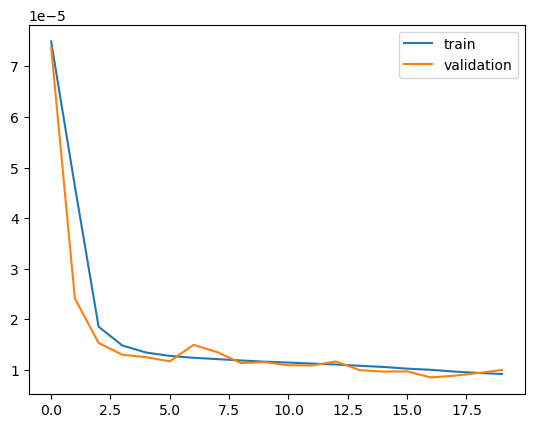

ValueError: Expected input data to be non-empty.

In [48]:


# Construction du modèle GRU
model = Sequential()
model.add(GRU(units=50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=50))
model.add(Dense(units=1))
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=20, batch_size=512, validation_split=0.1, verbose=2)

# Afficher la courbe d'apprentissage
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

# Évaluation du modèle sur les données de test
loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Loss sur les données de test : {loss}')






In [158]:
# Prédiction sur les données de test
predictions = model.predict(X_test)

# Inverse transform pour obtenir les prédictions dans l'échelle d'origine
predictions_original_scale = scaler.inverse_transform(predictions)

891/891 [==============================] - 4s 4ms/step


In [159]:

# Remplacer les valeurs négatives par zéro
predictions_original_scale[predictions_original_scale < 0] = 0

# Afficher les prédictions
print("Prédictions sur les données de test :")
print(predictions_original_scale)

# Afficher les vraies valeurs (non échelonnées) correspondantes aux prédictions
true_values = scaler.inverse_transform(y_test.reshape(-1, 1))
print("Vraies valeurs sur les données de test :")
print(true_values)

# Calculer et afficher le score du modèle sur les données de test
mse = mean_squared_error(true_values, predictions_original_scale)
print(f"Mean Squared Error sur les données de test : {mse}")
# Calculer RMSE
rmse = np.sqrt(mean_squared_error(true_values, predictions_original_scale))
print(f"Root Mean Squared Error (RMSE) sur les données de test : {rmse}")

# Calculer MAE
mae = mean_absolute_error(true_values, predictions_original_scale)
print(f"Mean Absolute Error (MAE) sur les données de test : {mae}")

# Calculer R²
r2 = r2_score(true_values, predictions_original_scale)
print(f"Coefficient de détermination (R²) sur les données de test : {r2}")


Prédictions sur les données de test :
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
Vraies valeurs sur les données de test :
[[2122.16396597]
 [-191.71876144]
 [-344.79972823]
 ...
 [ -89.36531399]
 [ 696.50244281]
 [1242.69740142]]
Mean Squared Error sur les données de test : 1337215.3013423434
Root Mean Squared Error (RMSE) sur les données de test : 1156.3802581081811
Mean Absolute Error (MAE) sur les données de test : 925.0946188022249
Coefficient de détermination (R²) sur les données de test : -0.10598919165550158


In [164]:
predictions_original_scale.mean()

2.1022406